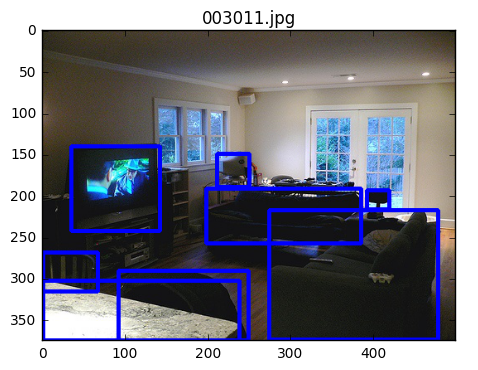

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import xml.etree.ElementTree as ET
import cv2

%matplotlib inline

dataset_dir='/home/roy/data/VOCdata/VOCdevkit/VOC2007/'

images_dir=os.path.join(dataset_dir, 'JPEGImages')
files_list = os.listdir(images_dir)
file_idx = np.random.randint(0, len(files_list))
file_name = os.path.join(images_dir, files_list[file_idx])
#print(file_name)

base_name=os.path.basename(files_list[file_idx])
no_ext = os.path.splitext(base_name)[0]
xml_name = os.path.join(dataset_dir, 'Annotations/' + no_ext + '.xml')
#print(xml_name)

tree = ET.parse(xml_name)

root=tree.getroot()
bboxes = []
for obj in root.findall('object'):
    bbox = obj.find('bndbox')
    xmin = int(bbox.find('xmin').text)
    ymin = int(bbox.find('ymin').text)
    xmax = int(bbox.find('xmax').text)
    ymax = int(bbox.find('ymax').text)
    #print(xmin, ymin, xmax, ymax)
    bboxes.append((xmin,ymin,xmax,ymax))

image = np.array(Image.open(file_name))
for bbox in bboxes:
    cv2.rectangle(image, bbox[:2], bbox[2:], (0,0,255),3)
plt.imshow(image)
plt.title(base_name)
plt.show()


/home/roy/data/kitti/training/image_2/003703.png
/home/roy/data/kitti/training/label_2/003703.txt
['Pedestrian', '0.00', '0', '-2.85', '377.06', '143.47', '448.40', '300.79', '1.94', '0.76', '1.23', '-2.43', '1.49', '9.17', '-3.10']


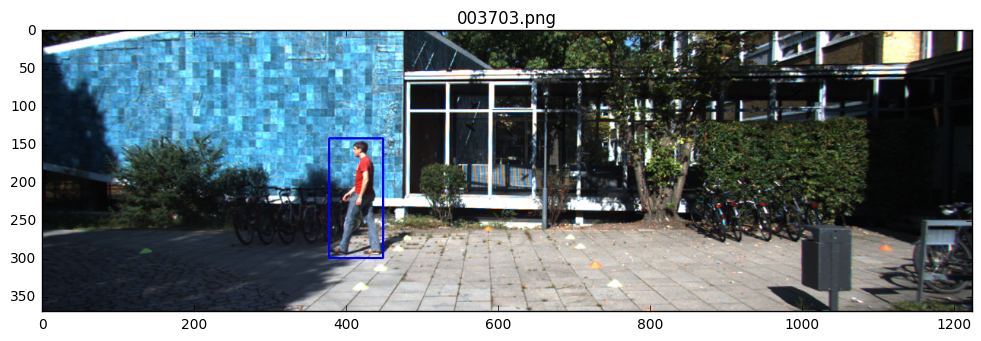

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import xml.etree.ElementTree as ET
import cv2
import math

%matplotlib inline

dataset_dir='/home/roy/data/kitti/training'

images_dir=os.path.join(dataset_dir, 'image_2')
files_list = os.listdir(images_dir)
file_idx = np.random.randint(0, len(files_list))
file_name = os.path.join(images_dir, files_list[file_idx])
print(file_name)

base_name=os.path.basename(files_list[file_idx])
no_ext = os.path.splitext(base_name)[0]
txt_name = os.path.join(dataset_dir, 'label_2/' + no_ext + '.txt')
print(txt_name)


bboxes = []
if os.path.exists(txt_name):
    with open(txt_name) as f:
        for l in f:
            data = l.split()
            #print(data)
            #print(data[4], data[5], data[6], data[7])
            bboxes.append((math.floor(float(data[4])), math.floor(float(data[5])),
                           math.floor(float(data[6])), math.floor(float(data[7]))))

image = np.array(Image.open(file_name))
for bbox in bboxes:
    cv2.rectangle(image, bbox[:2], bbox[2:], (0,0,255),2)
plt.figure(figsize=(12,6))
plt.imshow(image)
plt.title(base_name)
plt.show()